Problem statement :

There is a medical insurance company and this company wants to create an automatic system that can predict what is the medical insurance cost of person will be. Now build a machine learning system that predicts the medical insurance of a person.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading and understanding the data

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# Getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df. describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


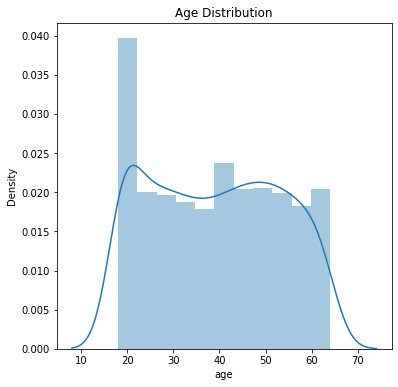

In [ ]:
 # Checking the distribution of each column
 
 plt.figure(figsize=(6,6))
 sns.distplot(df['age'])
 plt.title('Age Distribution')
 plt.show()

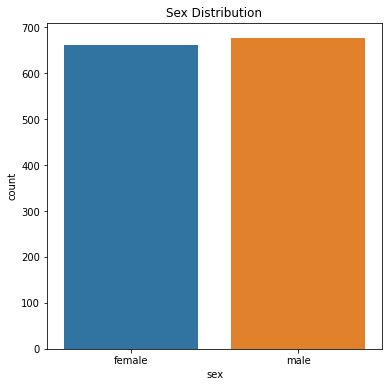

In [ ]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


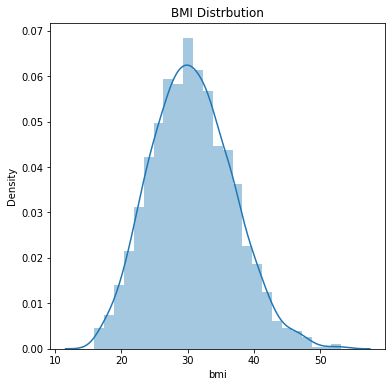

In [ ]:
# BMI column
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distrbution')
plt.show()

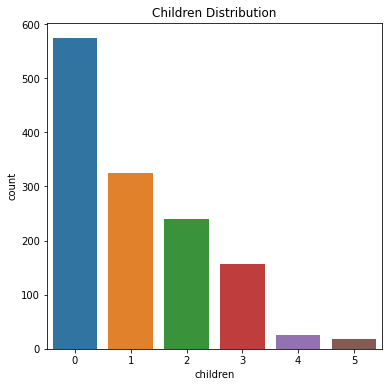

In [ ]:
#Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

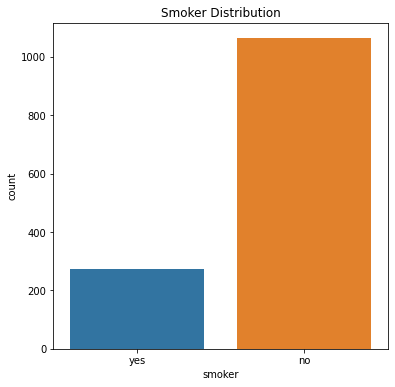

In [ ]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

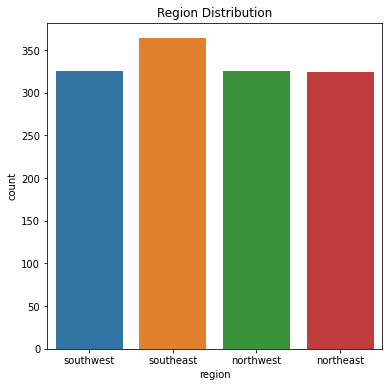

In [ ]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


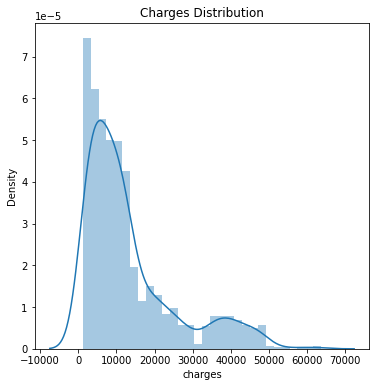

In [ ]:
# Charges column
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
# Changing the categorical columns to numerical
df.replace({'sex':{'male':1, 'female':0}}, inplace=True)

df.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)

df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


<AxesSubplot:xlabel='age'>

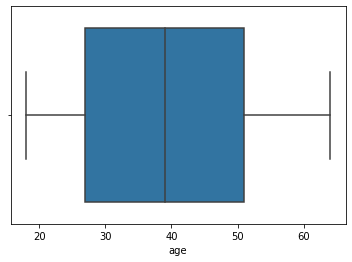

In [ ]:
#Checking the outliers
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='bmi'>

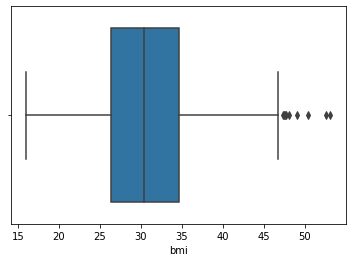

In [ ]:
sns.boxplot(x=df["bmi"])

<AxesSubplot:xlabel='children'>

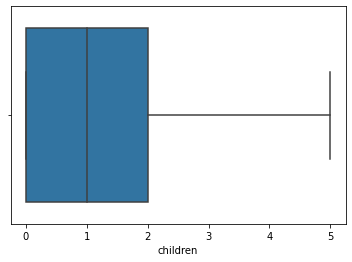

In [ ]:
sns.boxplot(x=df["children"])

In [ ]:
# Removing the outliers
q = df['bmi'].quantile(0.98)
df_cleaned = df[df['bmi']<q]

<AxesSubplot:>

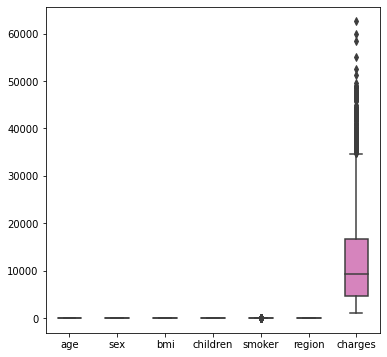

In [ ]:
fig = plt.subplots(figsize=(6,6))
sns.boxplot(data=df_cleaned, width=0.5)

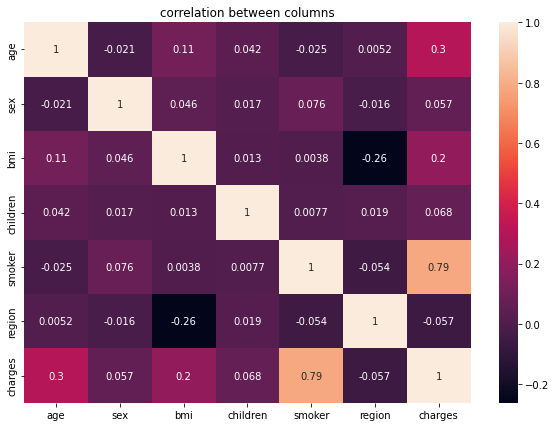

In [ ]:
# Checking the correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation between columns')
plt.show()

In [ ]:
# Split the dataset into training and testing sets
train_data, test_data = np.split(df.sample(frac=1, random_state=42), [int(0.8 * len(df))])

# Define the input features and target variable
X_train = train_data.drop([ "charges"], axis=1)
y_train = train_data["charges"]
X_test = test_data.drop([ "charges"], axis=1)
y_test = test_data["charges"]

# Define a function to calculate the mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define a function to split the data based on a given feature and threshold value
def split_data(X, y, feature, threshold):
    left_mask = X[feature] <= threshold
    right_mask = X[feature] > threshold
    X_left, y_left = X.loc[left_mask], y.loc[left_mask]
    X_right, y_right = X.loc[right_mask], y.loc[right_mask]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split point for a given feature
def find_best_split(X, y, feature):
    # Sort the data by the feature
    X_sorted = X.sort_values(feature)
    y_sorted = y[X_sorted.index]
    # Initialize the best split point and lowest mse
    best_split = None
    lowest_mse = float("inf")
    # Loop through each unique value of the feature
    for threshold in X_sorted[feature].unique():
        # Split the data at the current threshold
        X_left, y_left, X_right, y_right = split_data(X_sorted, y_sorted, feature, threshold)
        # Calculate the mse for the current split
        mse = mean_squared_error(y_left, y_left.mean()) + mean_squared_error(y_right, y_right.mean())
        # Update the best split and lowest mse if the current mse is lower
        if mse < lowest_mse:
            best_split = (feature, threshold)
            lowest_mse = mse
    return best_split, lowest_mse

In [ ]:
# Define a class for decision tree nodes
class Node:
    def __init__(self, X, y, depth=0, max_depth=5, min_samples_split=2):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_threshold = None
        self.prediction = y.mean()
        # Stop splitting if the node reaches the maximum depth or minimum number of samples
        if depth < max_depth and len(X) >= min_samples_split:
            # Find the best split point among all features
            best_split, lowest_mse = min([find_best_split(X, y, feature) for feature in X.columns], key=lambda x: x[1])
            # Create left and right child nodes and continue splitting recursively
            if best_split is not None:
                self.split_feature, self.split_threshold = best_split
                X_left, y_left, X_right, y_right = split_data(X, y, self.split_feature, self.split_threshold)
                self.left = Node(X_left, y_left, depth+1, max_depth, min_samples_split)
                self.right = Node(X_right, y_right, depth+1, max_depth, min_samples_split)
                self.prediction = None

    def predict_row(self, row):
        # Recursively traverse the tree to find the prediction for a given row
        if self.prediction is not None:
            return self.prediction
        elif row[self.split_feature] <= self.split_threshold:
            return self.left.predict_row(row)
        else:
            return self.right.predict_row(row)

    def predict(self, X):
        # Make predictions for all rows in X
        return np.array([self.predict_row(X.iloc[i]) for i in range(len(X))])

# Train the decision tree on the training data
tree = Node(X_train, y_train)

# Make predictions on the testing data
y_pred = tree.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 156038543.99099815


In [ ]:
y_pred

array([13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
        3167.45585   , 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
       13327.49045829, 13327.49045829, 13327.49045829, 13327.49045829,
      

In [ ]:
pred_df = pd.DataFrame({'charges':y_pred})

In [ ]:
pred_df.head()

,charges
0,13327.490458
1,13327.490458
2,13327.490458
3,13327.490458
4,13327.490458


In [ ]:
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

Predicted values: [13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
  3167.45585    13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327.49045829 13327.49045829 13327.49045829 13327.49045829
 13327

In [ ]:
import itertools

# Define the hyperparameter values to search
max_depth = [3, 5, 7]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_values = [max_depth, min_samples_split, min_samples_leaf]

# Create a decision tree regression object
dt = DecisionTreeRegressor()

# Initialize variables to hold the best hyperparameters and the corresponding mean squared error
best_params = None
best_mse = float('inf')

# Loop through all combinations of hyperparameters
for param_combination in itertools.product(*param_values):
    # Set the hyperparameters for the decision tree
    dt.max_depth = param_combination[0]
    dt.min_samples_split = param_combination[1]
    dt.min_samples_leaf = param_combination[2]
    
    
    
    # Make predictions on the testing data
    y_pred = np.array([tree.predict(x) for x in X_test.to_numpy()])
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # If the current combination of hyperparameters gives a lower mean squared error than the best so far, update the best hyperparameters and the corresponding mean squared error
    if mse < best_mse:
        best_params = param_combination
        best_mse = mse

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", best_params)
print("Mean squared error: ", best_mse)


NameError: ignored